In [7]:
from pandas import Series
series = Series.from_csv('data/champagne.csv')
print(series.describe())

count      105.000000
mean      4761.152381
std       2553.502601
min       1413.000000
25%       3113.000000
50%       4217.000000
75%       5221.000000
max      13916.000000
dtype: float64


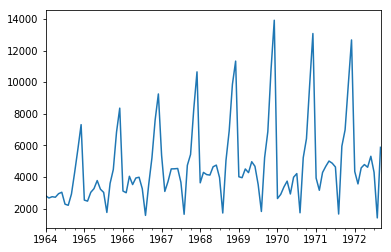

In [3]:
from matplotlib import pyplot
len(series)
series.plot()
pyplot.show()

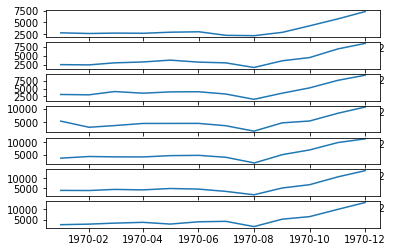

Empty DataFrame
Columns: []
Index: []


In [4]:
from pandas import DataFrame
from pandas import TimeGrouper

groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
pyplot.figure()
i = 1
n_groups = len(groups)
for name, group in groups:
	pyplot.subplot((n_groups*100) + 10 + i)
	i += 1
	pyplot.plot(group)
pyplot.show()
print(years)
print(groups)

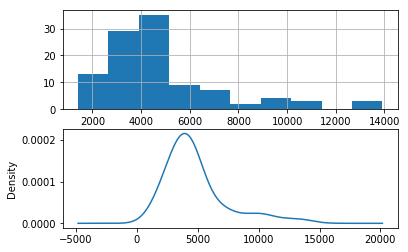

In [4]:
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

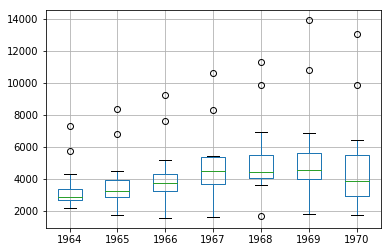

    1964  1965  1966   1967   1968   1969   1970
0   2815  2541  3113   5375   3633   4016   2639
1   2672  2475  3006   3088   4292   3957   2899
2   2755  3031  4047   3718   4154   4510   3370
3   2721  3266  3523   4514   4121   4276   3740
4   2946  3776  3937   4520   4647   4968   2927
5   3036  3230  3986   4539   4753   4677   3986
6   2282  3028  3260   3663   3965   3523   4217
7   2212  1759  1573   1643   1723   1821   1738
8   2922  3595  3528   4739   5048   5222   5221
9   4301  4474  5211   5428   6922   6872   6424
10  5764  6838  7614   8314   9858  10803   9842
11  7312  8357  9254  10651  11331  13916  13076


In [5]:
groups = series['1964':'1970'].groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years.boxplot()
pyplot.show()
print(years)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


ADF Statistic: -7.626619
p-value: 0.000000
Critical Values:
	1%: -3.504
	5%: -2.894
	10%: -2.584


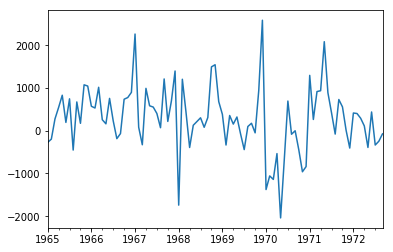

In [6]:
from statsmodels.tsa.stattools import adfuller
 
# create a differenced series
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return Series(diff)
 
X = series.values
X = X.astype('float32')
# difference data
months_in_year = 12
stationary = difference(X, months_in_year)
stationary.index = series.index[months_in_year:]
# check if stationary
result = adfuller(stationary)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))
# save
stationary.to_csv('stationary.csv')
# plot
stationary.plot()
pyplot.show()

In [5]:
# invert differenced value
def inverse_difference(history, yhat, interval=1):
	return yhat + history[-interval]

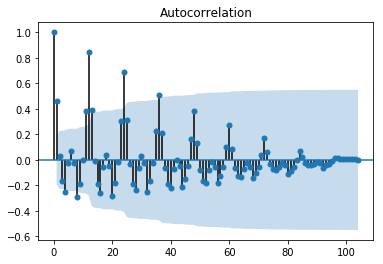

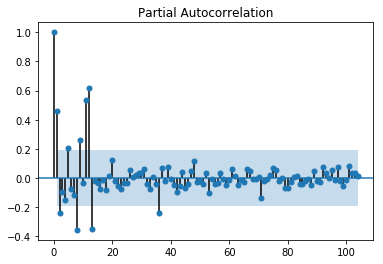

In [8]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf



plot_acf(series, ax=pyplot.gca())
pyplot.show()

#pyplot.subplot(212)

plot_pacf(series, ax=pyplot.gca())
pyplot.show()

In [9]:
df

NameError: name 'df' is not defined